# MODELLING

imports, libraries, and options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, mean_squared_error, f1_score, silhouette_score
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer, QuantileTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans, DBSCAN


pd.options.display.max_colwidth = 500
pd.options.display.max_columns = 99

<br>
read in df_for_modelling df from pkl as df and drop unmodelable columns

In [2]:
data= pd.read_pickle('datasets/df_for_modelling.pkl')
data.columns

Index(['wine', 'name', 'vintage', 'category', 'varietal', 'winery',
       'appellation', 'designation', 'alcohol', 'price', 'rating', 'reviewer',
       'location', 'geocode', 'lat', 'long', 'id', '4_prcp', '4_tmin',
       '4_tmax', '4_avg_tmin', '4_avg_tmax', '5_prcp', '5_tmin', '5_tmax',
       '5_avg_tmin', '5_avg_tmax', '6_prcp', '6_tmin', '6_tmax', '6_avg_tmin',
       '6_avg_tmax', '7_prcp', '7_tmin', '7_tmax', '7_avg_tmin', '7_avg_tmax',
       '8_prcp', '8_tmin', '8_tmax', '8_avg_tmin', '8_avg_tmax', '9_prcp',
       '9_tmin', '9_tmax', '9_avg_tmin', '9_avg_tmax', '10_prcp', '10_tmin',
       '10_tmax', '10_avg_tmin', '10_avg_tmax', 'spring_prcp_tot',
       'summer_prcp_tot', 'autumn_prcp_tot', 'spring_tmax_avg',
       'summer_tmax_avg', 'autumn_tmax_avg', 'spring_tmin_avg',
       'summer_tmin_avg', 'autumn_tmin_avg'],
      dtype='object')

In [3]:
# these columns won't be used in the modelling or to make new modelling df so we will drop them here 
data.drop(columns= ['wine', 'name', 'winery', 'appellation', 'designation', 'geocode', 'id'], inplace= True)
data.columns

Index(['vintage', 'category', 'varietal', 'alcohol', 'price', 'rating',
       'reviewer', 'location', 'lat', 'long', '4_prcp', '4_tmin', '4_tmax',
       '4_avg_tmin', '4_avg_tmax', '5_prcp', '5_tmin', '5_tmax', '5_avg_tmin',
       '5_avg_tmax', '6_prcp', '6_tmin', '6_tmax', '6_avg_tmin', '6_avg_tmax',
       '7_prcp', '7_tmin', '7_tmax', '7_avg_tmin', '7_avg_tmax', '8_prcp',
       '8_tmin', '8_tmax', '8_avg_tmin', '8_avg_tmax', '9_prcp', '9_tmin',
       '9_tmax', '9_avg_tmin', '9_avg_tmax', '10_prcp', '10_tmin', '10_tmax',
       '10_avg_tmin', '10_avg_tmax', 'spring_prcp_tot', 'summer_prcp_tot',
       'autumn_prcp_tot', 'spring_tmax_avg', 'summer_tmax_avg',
       'autumn_tmax_avg', 'spring_tmin_avg', 'summer_tmin_avg',
       'autumn_tmin_avg'],
      dtype='object')

<br>
make df of only monthly variables

In [4]:
month_df= data[['vintage', 'category', 'varietal', 'alcohol', 'price', 'rating', 'reviewer', 'location', 'lat', 'long', '4_prcp', '4_tmin', '4_tmax', 
                '4_avg_tmin', '4_avg_tmax', '5_prcp', '5_tmin', '5_tmax', '5_avg_tmin', '5_avg_tmax', '6_prcp', '6_tmin', '6_tmax', '6_avg_tmin', 
                '6_avg_tmax', '7_prcp', '7_tmin', '7_tmax', '7_avg_tmin', '7_avg_tmax', '8_prcp', '8_tmin', '8_tmax', '8_avg_tmin', '8_avg_tmax', 
                '9_prcp', '9_tmin', '9_tmax', '9_avg_tmin', '9_avg_tmax', '10_prcp', '10_tmin', '10_tmax', '10_avg_tmin', '10_avg_tmax']]

<br>
make df of only season variables

In [5]:
season_df= data[['vintage', 'category', 'varietal', 'alcohol', 'price', 'rating', 'reviewer', 'location', 'lat', 'long', 'spring_prcp_tot', 'summer_prcp_tot', 
                 'autumn_prcp_tot', 'spring_tmax_avg', 'summer_tmax_avg', 'autumn_tmax_avg', 'spring_tmin_avg', 'summer_tmin_avg', 'autumn_tmin_avg']]

<br>
calculate baseline accuracy, if we prdict the most common values --> 12.69%

In [6]:
data['rating'].value_counts(normalize= True).head(1) * 100

88    12.693338
Name: rating, dtype: float64

<br>
basic linear regression model on month_df and season_df ONLY using climate terms in X

In [7]:
# define X and y and do train_test_split
X= month_df.drop(columns= ['vintage', 'category', 'varietal', 'alcohol', 'price', 'rating', 'reviewer', 'location', 'lat', 'long'])
y= month_df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

# need to scale data since variables are different magnitudes
ss= StandardScaler()
ss.fit(X_train)
Z_train= ss.transform(X_train)
Z_test= ss.transform(X_test)

# instantiate and fit model
lr= LinearRegression()
lr.fit(Z_train, y_train)

# cross val score
print(f'month_df cross val score is {round(cross_val_score(lr, Z_train, y_train, cv= 5).mean(), 4)}')

# train and test scores
print(f'month_df train score is {round(lr.score(Z_train, y_train), 4)}')
print(f'month_df test score is {round(lr.score(Z_test, y_test), 4)}')

# model preditictions
train_y_preds = lr.predict(Z_train)
test_y_preds = lr.predict(Z_test)

# rmse
print(f'month_df train model is off by {round(mean_squared_error(y_train, train_y_preds) ** 0.5, 2)}')
print(f'month_df test model is off by {round(mean_squared_error(y_test, test_y_preds) ** 0.5, 2)}')

month_df cross val score is 0.177
month_df train score is 0.1846
month_df test score is 0.1675
month_df train model is off by 2.85
month_df test model is off by 2.9


In [8]:
# define X and y and do train_test_split
X= season_df.drop(columns= ['vintage', 'category', 'varietal', 'alcohol', 'price', 'rating', 'reviewer', 'location', 'lat', 'long'])
y= season_df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

# need to scale data since variables are different magnitudes
ss= StandardScaler()
ss.fit(X_train)
Z_train= ss.transform(X_train)
Z_test= ss.transform(X_test)

# instantiate and fit model
lr= LinearRegression()
lr.fit(Z_train, y_train)

# cross val score
print(f'season_df cross val score is {round(cross_val_score(lr, Z_train, y_train, cv= 5).mean(), 4)}')

# train and test scores
print(f'season_df train score is {round(lr.score(Z_train, y_train), 4)}')
print(f'season_df test score is {round(lr.score(Z_test, y_test), 4)}')

# model preditictions
train_y_preds = lr.predict(Z_train)
test_y_preds = lr.predict(Z_test)

# rmse
print(f'season_df train model is off by {round(mean_squared_error(y_train, train_y_preds) ** 0.5, 2)}')
print(f'season_df test model is off by {round(mean_squared_error(y_test, test_y_preds) ** 0.5, 2)}')

season_df cross val score is 0.0666
season_df train score is 0.0689
season_df test score is 0.0727
season_df train model is off by 3.04
season_df test model is off by 3.06


both model are neither underfit or ovefit, yet the more climate explicit month_df has a test score of 0.1675 which is greather than the season_df test score of 0.0727, therefore we will move head with month_df to try and get a better R^2 score

<br>
dummify vareital and category variables in month_df and then perform another linear regression using other numeric features such as price, alcohol, vintage, lat, long in X

In [9]:
month_dum= pd.get_dummies(month_df, columns= ['varietal', 'category'], drop_first= True)

In [10]:
# define X and y and do train_test_split
X= month_dum.drop(columns= ['rating', 'reviewer', 'location'])
y= month_dum['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

# need to scale data since variables are different magnitudes
ss= StandardScaler()
ss.fit(X_train)
Z_train= ss.transform(X_train)
Z_test= ss.transform(X_test)

# instantiate and fit model
lr= LinearRegression()
lr.fit(Z_train, y_train)

# cross val score
print(f'month_df cross val score is {round(cross_val_score(lr, Z_train, y_train, cv= 5).mean(), 4)}')

# train and test scores
print(f'month_df train score is {round(lr.score(Z_train, y_train), 4)}')
print(f'month_df test score is {round(lr.score(Z_test, y_test), 4)}')

# model preditictions
train_y_preds = lr.predict(Z_train)
test_y_preds = lr.predict(Z_test)

# rmse
print(f'month_df train model is off by {round(mean_squared_error(y_train, train_y_preds) ** 0.5, 2)}')
print(f'month_df test model is off by {round(mean_squared_error(y_test, test_y_preds) ** 0.5, 2)}')

month_df cross val score is 0.3807
month_df train score is 0.3901
month_df test score is 0.3734
month_df train model is off by 2.46
month_df test model is off by 2.51


<br>
use the above model set up to try a couple different regression strategies using base models

In [11]:
# define X and y and do train_test_split
X= month_dum.drop(columns= ['rating', 'reviewer', 'location'])
y= month_dum['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

# need to scale data since variables are different magnitudes
ss= StandardScaler()
ss.fit(X_train)
Z_train= ss.transform(X_train)
Z_test= ss.transform(X_test)

In [12]:
# random forest regressor
# instantiate and fit model
rf= RandomForestRegressor(random_state= 42)
rf.fit(X_train, y_train)

# train and test scores
print(f'random forests train score: {round(rf.score(X_train, y_train), 4)}')
print(f'random forests test score: {round(rf.score(X_test, y_test), 4)}')

# model preditictions
train_y_preds = rf.predict(X_train)
test_y_preds = rf.predict(X_test)

# rmse
print(f'random forests train model is off by {round(mean_squared_error(y_train, train_y_preds) ** 0.5, 2)}')
print(f'random forests test model is off by {round(mean_squared_error(y_test, test_y_preds) ** 0.5, 2)}')

random forests train score: 0.9008
random forests test score: 0.3685
random forests train model is off by 0.99
random forests test model is off by 2.52


In [13]:
# k-nearest neighbors
# instantiate and fit model
knn= KNeighborsRegressor()
knn.fit(Z_train, y_train)

# train and test scores
print(f'knn train score: {round(knn.score(Z_train, y_train), 4)}')
print(f'knn test score: {round(knn.score(Z_test, y_test), 4)}')

# model preditictions
train_y_preds = knn.predict(Z_train)
test_y_preds = knn.predict(Z_test)

# rmse
print(f'knn train model is off by {round(mean_squared_error(y_train, train_y_preds) ** 0.5, 2)}')
print(f'knn test model is off by {round(mean_squared_error(y_test, test_y_preds) ** 0.5, 2)}')

knn train score: 0.5451
knn test score: 0.2878
knn train model is off by 2.13
knn test model is off by 2.68


In [14]:
# bagged decision tree
# instantiate and fit model
bagtree= BaggingRegressor(random_state= 42)
bagtree.fit(X_train, y_train)

# train and test scores
print(f'bagged decision trees train score: {round(bagtree.score(X_train, y_train), 4)}')
print(f'bagged decision trees test score: {round(bagtree.score(X_test, y_test), 4)}')

# model preditictions
train_y_preds = bagtree.predict(X_train)
test_y_preds = bagtree.predict(X_test)

# rmse
print(f'bagged decision trees train model is off by {round(mean_squared_error(y_train, train_y_preds) ** 0.5, 2)}')
print(f'bagged decision trees test model is off by {round(mean_squared_error(y_test, test_y_preds) ** 0.5, 2)}')

bagged decision trees train score: 0.8725
bagged decision trees test score: 0.3144
bagged decision trees train model is off by 1.13
bagged decision trees test model is off by 2.63


In [15]:
# ada boost
# instantiate and fit model
ada= AdaBoostRegressor(random_state= 42)
ada.fit(X_train, y_train)

# train and test scores
print(f'ada boost train score: {round(ada.score(X_train, y_train), 4)}')
print(f'ada boost test score: {round(ada.score(X_test, y_test), 4)}')

# model preditictions
train_y_preds = ada.predict(X_train)
test_y_preds = ada.predict(X_test)

# rmse
print(f'ada boost train model is off by {round(mean_squared_error(y_train, train_y_preds) ** 0.5, 2)}')
print(f'ada boost test model is off by {round(mean_squared_error(y_test, test_y_preds) ** 0.5, 2)}')

ada boost train score: 0.362
ada boost test score: 0.3485
ada boost train model is off by 2.52
ada boost test model is off by 2.56


In [16]:
# svr
# instantiate and fit model
svr= SVR() 
svr.fit(Z_train, y_train)

# train and test scores
print(f'svr train score: {round(svr.score(Z_train, y_train), 4)}')
print(f'svr test score: {round(svr.score(Z_test, y_test), 4)}')

# model preditictions
train_y_preds = svr.predict(Z_train)
test_y_preds = svr.predict(Z_test)

# rmse
print(f'svr train model is off by {round(mean_squared_error(y_train, train_y_preds) ** 0.5, 2)}')
print(f'svr test model is off by {round(mean_squared_error(y_test, test_y_preds) ** 0.5, 2)}')

svr train score: 0.4592
svr test score: 0.4025
svr train model is off by 2.32
svr test model is off by 2.45


the linear regression model performs the best without being overfit or underfit with train/test scores of 0.3901/0.3734. the best model with the highest test score is the svr model with a test score of 0.4025.

<br>
because there are a lot of variables in the dummied month_df, and a good portion of them are probably useful to the model to predict rating

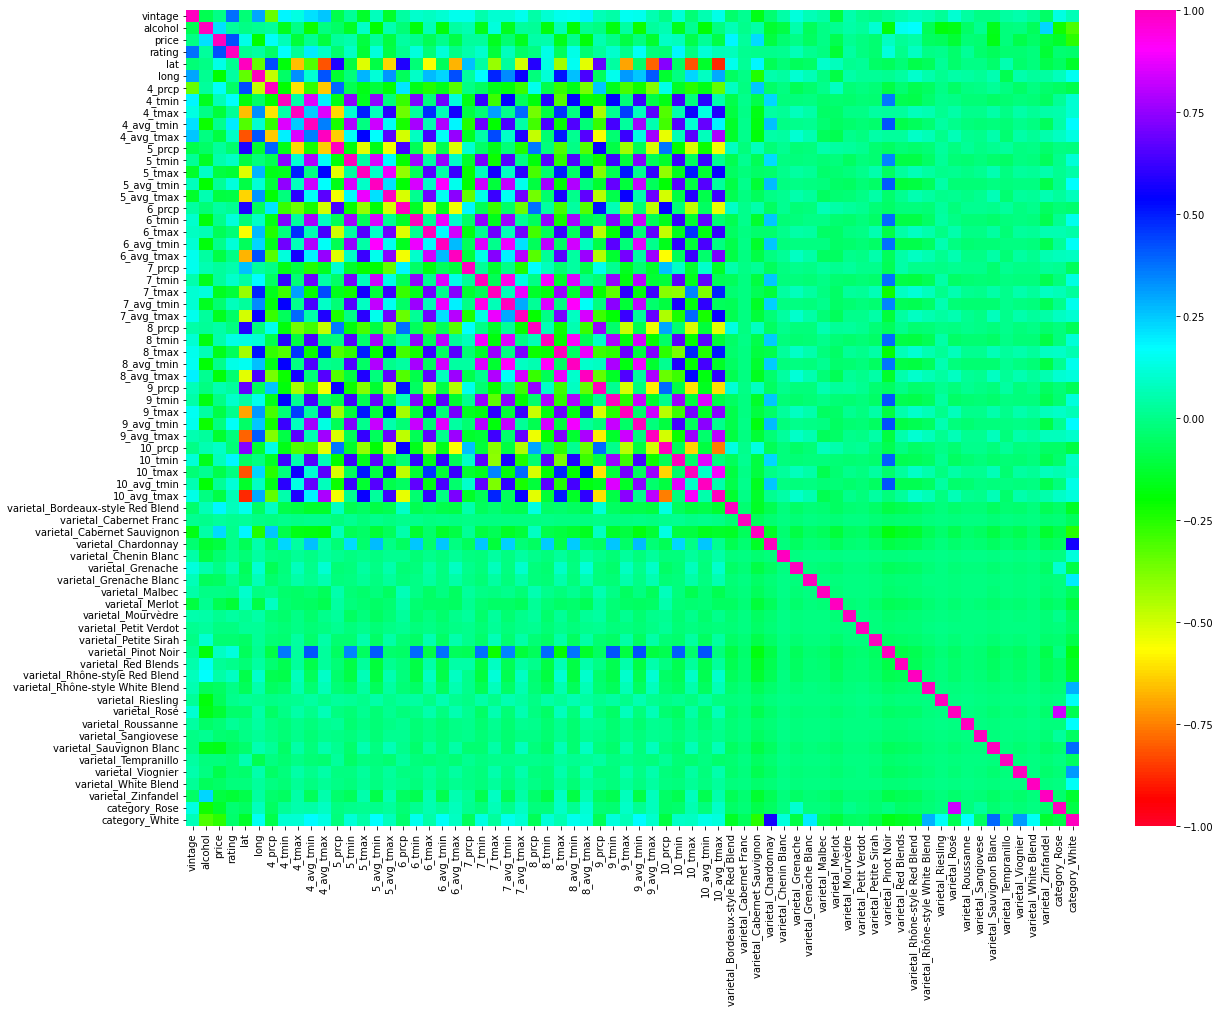

In [17]:
plt.figure(figsize= (20, 15))
sns.heatmap(month_dum.corr(), vmin= -1, vmax= 1, cmap= 'gist_rainbow');

the next part of the process will be to perform a lasso regression with month_df and grid search to optimize lasso parameters. this is the will make the unnecessary variables eqaul to 0 and we can look and see which variables the model used to predict y

In [18]:
# define X and y and do train_test_split
X= month_dum.drop(columns= ['rating', 'reviewer', 'location'])
y= month_dum['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

# need to scale data since variables are different magnitudes
ss= StandardScaler()
ss.fit(X_train)
Z_train= ss.transform(X_train)
Z_test= ss.transform(X_test)

In [19]:
# instantiate pipeline
pipe_lasso = Pipeline([
    ('ss', StandardScaler()),
    ('lasso', Lasso(random_state= 42))
])

# define parameters
pipe_lasso_params = {
    'lasso__alpha': np.linspace(0.000001, 0.01, 30),
    'lasso__max_iter': [500, 1000, 1500]
}

# instatiate gridsearch and fit model
pipe_lasso_gs = GridSearchCV(pipe_lasso, pipe_lasso_params, cv=5, verbose=1)
pipe_lasso_gs.fit(X_train, y_train);

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\kindb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19240.674762057017, tolerance: 6.900349474290654
  model = cd_fast.enet_coordinate_descent(
C:\Users\kindb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20845.0097146829, tolerance: 6.919909261126313
  model = cd_fast.enet_coordinate_descent(
C:\Users\kindb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20244.48228498364, tolerance: 6.943735013682838
  model = cd_fast.enet_coordinate_descent(
C:\Users\kindb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

In [20]:
# find best parameters of pipeline and train/test scores
print(f'best estimator: {pipe_lasso_gs.best_estimator_}')
print(f'best params: {pipe_lasso_gs.best_params_}')
print(f'lasso train score: {round(pipe_lasso_gs.score(X_train, y_train), 4)}')
print(f'lasso test score: {round(pipe_lasso_gs.score(X_test, y_test), 4)}')

best estimator: Pipeline(steps=[('ss', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0.0010353793103448276, max_iter=500,
                       random_state=42))])
best params: {'lasso__alpha': 0.0010353793103448276, 'lasso__max_iter': 500}
lasso train score: 0.39
lasso test score: 0.3738


In [67]:
# need to rerun above  model to make df of relevant variables
# instantiate and fit model
lasso= Lasso(alpha= 0.0010353793103448276, max_iter= 500, random_state= 42)
lasso.fit(Z_train, y_train)

# train and test scores
print(f'lasso train score: {round(lasso.score(Z_train, y_train), 4)}')
print(f'lasso test score: {round(lasso.score(Z_test, y_test), 4)}')

# dataframe of variable name and lasso coefficients
coef_df = pd.DataFrame({
    'coef': (X.columns),
    'lasso_coefs': lasso.coef_
})

# top 10 variables that had a positive effect on rating
coef_df[coef_df['lasso_coefs'] != 0].sort_values(by= ['lasso_coefs'], ascending= False).head(10)

lasso train score: 0.39
lasso test score: 0.3738


,coef,lasso_coefs
2,price,1.157213
0,vintage,0.937004
39,10_avg_tmax,0.787785
34,9_avg_tmax,0.775680
36,10_tmin,0.685121
8,4_avg_tmin,0.653667
3,lat,0.590471
28,8_avg_tmin,0.541653
5,4_prcp,0.482796
4,long,0.433368


In [68]:
# top 10 variables that had a negative effect on rating
coef_df[coef_df['lasso_coefs'] != 0].sort_values(by= ['lasso_coefs'], ascending= False).tail(10)

,coef,lasso_coefs
22,7_tmax,-0.213826
31,9_tmin,-0.218096
6,4_tmin,-0.246598
37,10_tmax,-0.262029
24,7_avg_tmax,-0.262382
11,5_tmin,-0.286640
18,6_avg_tmin,-0.325864
14,5_avg_tmax,-0.360773
29,8_avg_tmax,-0.668010
38,10_avg_tmin,-0.807233


In [69]:
coef_df[coef_df['lasso_coefs'] == 0]

,coef,lasso_coefs
23,7_avg_tmin,0.0
32,9_tmax,0.0
41,varietal_Cabernet Franc,0.0
55,varietal_Rhône-style White Blend,-0.0


<br>
doing some feature engineering with PolynomialFeatures could tease out more dynamic relationships between certain climate variables, etc, then fit to lasso model with above parameters

In [23]:
# define X and y and do train_test_split
X= month_dum.drop(columns= ['rating', 'reviewer', 'location'])
y= month_dum['rating']

# instatntiate polyfeatures and fit to X and do train test split
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly= poly.fit_transform(X)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, random_state=42)

# need to scale data since variables are different magnitudes
sc = StandardScaler()
Z_train_p = sc.fit_transform(X_train_p)
Z_test_p = sc.transform(X_test_p)

# check how many more variables we have
X_poly.shape[1]

2345

In [24]:
# instantiate and fit model
lasso= Lasso(alpha= 0.0010353793103448276, max_iter= 500, random_state= 42)
lasso.fit(Z_train_p, y_train_p)

# train and test scores
print(f'poly lasso train score: {round(lasso.score(Z_train_p, y_train_p), 4)}')
print(f'poly lasso test score: {round(lasso.score(Z_test_p, y_test_p), 4)}')

poly lasso train score: 0.4841
poly lasso test score: 0.3842


C:\Users\kindb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13999.891062814319, tolerance: 8.6304279525291
  model = cd_fast.enet_coordinate_descent(


In [25]:
# dataframe of variable name and lasso coefficients
coef_df = pd.DataFrame({
    'coef': (poly.get_feature_names(X.columns)),
    'lasso_coefs': lasso.coef_
})

# top 10 variables that had a positive effect on rating
coef_df[coef_df['lasso_coefs'] != 0].sort_values(by= ['lasso_coefs'], ascending= False).head(10)

,coef,lasso_coefs
2,price,1.726982
1341,7_tmax varietal_Red Blends,1.424830
138,alcohol 4_prcp,1.347360
1684,9_tmin 10_tmin,0.969657
268,lat 4_tmin,0.921496
0,vintage,0.789355
454,4_tmin^2,0.777847
759,5_tmin 7_tmin,0.682629
677,4_avg_tmax varietal_Pinot Noir,0.679537
135,alcohol price,0.665396


In [26]:
# top 10 variables that had a negative effect on rating
coef_df[coef_df['lasso_coefs'] != 0].sort_values(by= ['lasso_coefs'], ascending= False).tail(10)

,coef,lasso_coefs
1340,7_tmax varietal_Pinot Noir,-0.617208
315,lat varietal_Red Blends,-0.632933
633,4_avg_tmin category_White,-0.687526
1940,10_avg_tmax varietal_Bordeaux-style Red Blend,-0.697479
561,4_tmax varietal_Red Blends,-0.720998
603,4_avg_tmin 10_tmin,-0.736670
305,lat varietal_Chardonnay,-0.834106
550,4_tmax varietal_Cabernet Sauvignon,-0.839628
200,price^2,-0.855990
139,alcohol 4_tmin,-1.517964


the lasso model with the polyfeat has a slighly higher test score (0.3842) than the lasso without polyfeat (0.3738) even though it is overfit

<br>
due to our data not being the most completely normally-distributed (refer to 03_eda_and_data_viz.ipynb), StandardScalar may not be the best feature transformer to use. the PowerTransformer and QuantileTransformer can be used on non-Gaussian data and mght improve performance. this analysis here uses non-polyfeat month_dum. whichever perform best will be rerun with polyfeat and lasso regression

In [27]:
# define X and y and do train_test_split
X= month_dum.drop(columns= ['rating', 'reviewer', 'location'])
y= month_dum['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

In [28]:
# power transformer
# instantiate and scale data
pt= PowerTransformer()
pt.fit(X_train)
pt_train= pt.transform(X_train)
pt_test= pt.transform(X_test)

# instantiate and fit model
lasso= Lasso(alpha= 0.0010353793103448276, max_iter= 500, random_state= 42)
lasso.fit(pt_train, y_train)

# train and test scores
print(f'power transformer lasso train score: {round(lasso.score(pt_train, y_train), 4)}')
print(f'power transformer lasso test score: {round(lasso.score(pt_test, y_test), 4)}')

C:\Users\kindb\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3202: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\kindb\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\kindb\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
C:\Users\kindb\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


power transformer lasso train score: 0.4016
power transformer lasso test score: 0.394


In [29]:
# quantile transformer
# instantiate and scale data
qt= QuantileTransformer(output_distribution= 'normal')
qt.fit(X_train)
qt_train= qt.transform(X_train)
qt_test= qt.transform(X_test)

# instantiate and fit model
lasso= Lasso(alpha= 0.0010353793103448276, max_iter= 500, random_state= 42)
lasso.fit(qt_train, y_train)

# train and test scores
print(f'quantile transformer lasso train score: {round(lasso.score(qt_train, y_train), 4)}')
print(f'quantile transformer lasso test score: {round(lasso.score(qt_test, y_test), 4)}')

quantile transformer lasso train score: 0.3983
quantile transformer lasso test score: 0.3991


C:\Users\kindb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.824077830417082, tolerance: 8.6304279525291
  model = cd_fast.enet_coordinate_descent(


it appears that the quantile transformer has the highest test scores with 0.3991 so now we will do a polyfeat on the data and use the quantile transformer in a lasso regression

In [30]:
# define X and y and do train_test_split
X= month_dum.drop(columns= ['rating', 'reviewer', 'location'])
y= month_dum['rating']

# instatntiate polyfeatures and fit to X and do train test split
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly= poly.fit_transform(X)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, random_state=42)

# need to scale data since variables are different magnitudes
qt= QuantileTransformer(output_distribution= 'normal')
Z_train_p = qt.fit_transform(X_train_p)
Z_test_p = qt.transform(X_test_p)

# instantiate and fit model
lasso= Lasso(alpha= 0.0010353793103448276, max_iter= 500, random_state= 42)
lasso.fit(Z_train_p, y_train_p)

# train and test scores
print(f'poly lasso train score: {round(lasso.score(Z_train_p, y_train_p), 4)}')
print(f'poly lasso test score: {round(lasso.score(Z_test_p, y_test_p), 4)}')

poly lasso train score: 0.4892
poly lasso test score: 0.3983


C:\Users\kindb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17268.019856377403, tolerance: 8.6304279525291
  model = cd_fast.enet_coordinate_descent(


the polyfeat qt lasso model performed slightly worse and was more overfit than the qt lasso model which seems to be the best model for all wines.

<br> 
looking at the residuals and LINE assumptions will be important in understanding why we aren't having better performance and we will use the qt lasso model for this.

In [31]:
# instantiate and scale data
qt= QuantileTransformer(output_distribution= 'normal')
qt.fit(X_train)
qt_train= qt.transform(X_train)
qt_test= qt.transform(X_test)

# instantiate and fit model
lasso= Lasso(alpha= 0.0010353793103448276, max_iter= 500, random_state= 42)
lasso.fit(qt_train, y_train)

# calculate preds and residuals
y_preds= lasso.predict(qt_train)
resids= y_train- y_preds

C:\Users\kindb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.824077830417082, tolerance: 8.6304279525291
  model = cd_fast.enet_coordinate_descent(


L- is the data linear?

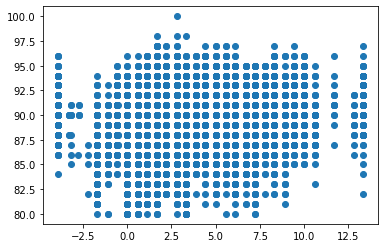

In [32]:
plt.scatter(X['10_tmin'],y); # any X variable can be put here

I- is the data independent? not really, there are columns that are dependent upon each other, climate data is related to time

N- are the residuals normally distributed? sort of, more residuals are negative, but it does center around 0

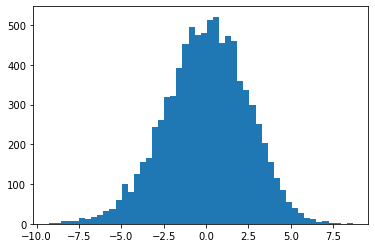

In [33]:
plt.hist(resids, bins=50);

E- it the data homoscedastic (equal variances)? not completely equal around 0, more negative residuals so kind of heteroscedastic

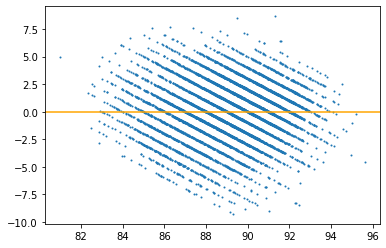

In [46]:
plt.scatter(y_preds, resids, s=1)
plt.axhline(0, color="orange");

<br>
since SVR model had the highest test score above, despite being overfit, let's check it's performance with the quantile transformer 

In [55]:
# define X and y and do train_test_split
X= month_dum.drop(columns= ['rating', 'reviewer', 'location'])
y= month_dum['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

# instantiate and scale data
qt= QuantileTransformer(output_distribution= 'normal')
qt.fit(X_train)
qt_train= qt.transform(X_train)
qt_test= qt.transform(X_test)

# instantiate and fit model
svr= SVR() 
svr.fit(qt_train, y_train)

# train and test scores
print(f'svr train score: {round(svr.score(qt_train, y_train), 4)}')
print(f'svr test score: {round(svr.score(qt_test, y_test), 4)}')

# model preditictions
train_y_preds = svr.predict(qt_train)
test_y_preds = svr.predict(qt_test)

# rmse
print(f'qt svr train model is off by {round(mean_squared_error(y_train, train_y_preds) ** 0.5, 2)}')
print(f'qt svr test model is off by {round(mean_squared_error(y_test, test_y_preds) ** 0.5, 2)}')

svr train score: 0.4244
svr test score: 0.404
qt svr train model is off by 2.39
qt svr test model is off by 2.45


let's check polyfeat too

In [36]:
# define X and y and do train_test_split
X= month_dum.drop(columns= ['rating', 'reviewer', 'location'])
y= month_dum['rating']

# instatntiate polyfeatures and fit to X and do train test split
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly= poly.fit_transform(X)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, random_state=42)

# need to scale data since variables are different magnitudes
qt= QuantileTransformer(output_distribution= 'normal')
qt_train_p = qt.fit_transform(X_train_p)
qt_test_p = qt.transform(X_test_p)

# instantiate and fit model
svr= SVR() 
svr.fit(qt_train_p, y_train_p)

# train and test scores
print(f'svr train score: {round(svr.score(qt_train_p, y_train_p), 4)}')
print(f'svr test score: {round(svr.score(qt_test_p, y_test_p), 4)}')

# model preditictions
train_y_preds = svr.predict(qt_train_p)
test_y_preds = svr.predict(qt_test_p)

# rmse
print(f'poly qt svr train model is off by {round(mean_squared_error(y_train_p, train_y_preds) ** 0.5, 2)}')
print(f'poly qt svr test model is off by {round(mean_squared_error(y_test_p, test_y_preds) ** 0.5, 2)}')

svr train score: 0.4057
svr test score: 0.3927
poly qt svr train model is off by 2.43
poly qt svr test model is off by 2.47


it appears the best model that is the svr qt lasso with a train/test score of (0.4244/0.404)! from changing feature transformers, we were able to increase our test score. 

<br>
let's check out just wines from paso robles: 4972 wines

In [37]:
# define paso_robles and get dummies
paso_robles= data[data['location'].str.contains('Paso Robles')]
pr_dum= pd.get_dummies(paso_robles, columns= ['category', 'varietal'], drop_first= True)

# define X and y and do train_test_split
X= pr_dum.drop(columns= ['rating', 'reviewer', 'location'])
y= pr_dum['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

# need to scale data since variables are different magnitudes
qt= QuantileTransformer(output_distribution= 'normal')
qt.fit(X_train)
qt_train= qt.transform(X_train)
qt_test= qt.transform(X_test)

# instantiate and fit model
lasso= Lasso(alpha= 0.0010353793103448276, max_iter= 500, random_state= 42)
lasso.fit(qt_train, y_train)

# train and test scores
print(f'quantile transformer lasso train score: {round(lasso.score(qt_train, y_train), 4)}')
print(f'quantile transformer lasso test score: {round(lasso.score(qt_test, y_test), 4)}')

quantile transformer lasso train score: 0.5102
quantile transformer lasso test score: 0.5049


C:\Users\kindb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1360.493868234762, tolerance: 3.963973022257978
  model = cd_fast.enet_coordinate_descent(


<br> 
check out only cabernet sauvignon (most popular wine)

In [38]:
# define cabsav and get dummies
cabsav= data[data['varietal'].str.contains('Cabernet Sauvignon')]
cs_dum= pd.get_dummies(cabsav, columns= ['category', 'varietal'], drop_first= True)

# define X and y and do train_test_split
X= cs_dum.drop(columns= ['rating', 'reviewer', 'location'])
y= cs_dum['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

# need to scale data since variables are different magnitudes
qt= QuantileTransformer(output_distribution= 'normal')
qt.fit(X_train)
qt_train= qt.transform(X_train)
qt_test= qt.transform(X_test)

# instantiate and fit model
lasso= Lasso(alpha= 0.0010353793103448276, max_iter= 500, random_state= 42)
lasso.fit(qt_train, y_train)

# train and test scores
print(f'qt lasso train score: {round(lasso.score(qt_train, y_train), 4)}')
print(f'qt lasso test score: {round(lasso.score(qt_test, y_test), 4)}')

qt lasso train score: 0.3428
qt lasso test score: 0.3242


C:\Users\kindb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 524.6418930712243, tolerance: 1.8463813242784393
  model = cd_fast.enet_coordinate_descent(
